# 1. 모델 읽어 오기
> 학습이 오래 걸림으로 기존에 저장해 놓은 모델을 배포하고 이를 이용하여 수업을 진행하자.

In [1]:
from keras.models import load_model

model_path = 'model/cats_and_dogs_0718.keras'
model = load_model(model_path)

훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보겠습니다:

In [3]:
import numpy as  np

history = np.load('model/my_history_0718.npy', allow_pickle='TRUE').item()

# 2. 그래프를 이용한 데이터 분석

In [4]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

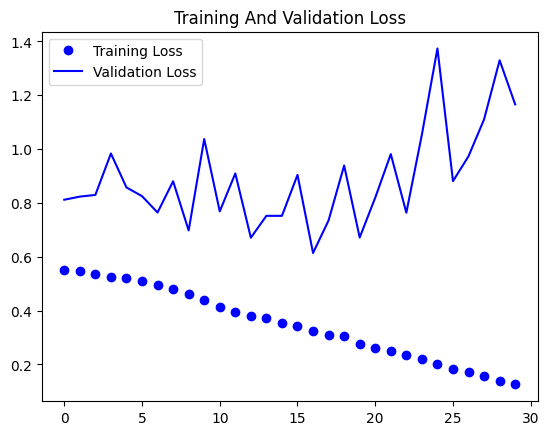

In [6]:
import matplotlib.pyplot as plt 

loss = history['loss']
val_loss= history['val_loss']

epochs=range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
plt.show()

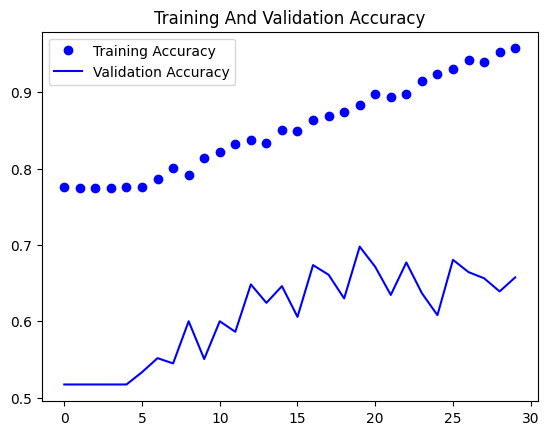

In [8]:
acc = history['accuracy']
val_acc= history['val_accuracy']

epochs=range(len(loss))

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()
plt.show()

> 이 그래프는 과대적합의 특성을 보여준다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달한다. 반면 검증 정확도는 70% 주위에서 변화하고 있다.

> 이 그래프 역시 과대적합의 특성을 보여준다. 검증 손실은 epoch가 증가할 수록 점점 올라가고 있는 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소하고 있다.

> 이렇게 과적합 현상이 일어나는 것은 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 나타나는 문제이다. 

> 여기에서는 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 데이터 증식에 대해 알아 보자

# 3. 데이터 증식 사용하기

> 과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생한다. 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 랜덤하게 생성하는 방법이다.

## 3.1 ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator (
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

> ImageDataGenerator에 다음과 같은 파라미터를 이용하여 랜덤한 이미지를 추가할 수 있다.
* `rotation_range`는 랜덤하게 사진을 회전시킬 각도 범위이다(0-180 사이).
* `width_shift_range`와 `height_shift_range`는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위이다(전체 넓이와 높이에 대한 비율).
* `shear_range`는 랜덤하게 기울림을 적용할 각도 범위이다.
* `zoom_range`는 랜덤하게 사진을 확대, 축소할 범위입니다.
* `horizontal_flip`은 랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 있을 때 사용한다(예, 풍경/인물 사진).
* `fill_mode`는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 때 사용한다.
  - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
  - 'nearest': aaaaaaaa|abcd|dddddddd
  - 'reflect': abcddcba|abcd|dcbaabcd
  - 'wrap': abcdabcd|abcd|abcdabcd


참조 : https://keras.io/ko/preprocessing/image/

## 3.2 랜덤 이미지 확인
> 위의 ImageDataGenerator을 이용하여 변경된 이미지를 간단하게 확인해 보자

In [10]:
from tensorflow.keras.preprocessing import image
import os

train_cats_dir = 'image/cats_and_dogs/data/train/cats'
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]
img_path

'image/cats_and_dogs/data/train/cats\\cat.100.jpg'

In [11]:
img = image.load_img(img_path, target_size=(150,150))
print(img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x20346A55160>


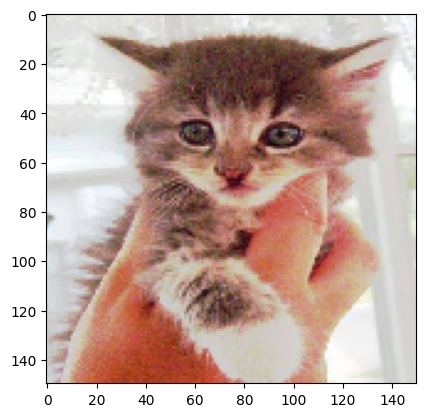

In [12]:
plt.imshow(img)

In [13]:
x = image.img_to_array(img)
x

array([[[222., 223., 218.],
        [223., 224., 219.],
        [223., 224., 219.],
        ...,
        [240., 241., 246.],
        [234., 235., 240.],
        [247., 244., 251.]],

       [[219., 220., 215.],
        [222., 223., 218.],
        [224., 225., 220.],
        ...,
        [243., 244., 249.],
        [234., 235., 240.],
        [239., 242., 247.]],

       [[226., 227., 222.],
        [224., 225., 220.],
        [223., 224., 219.],
        ...,
        [242., 243., 248.],
        [241., 242., 247.],
        [232., 240., 243.]],

       ...,

       [[207., 210., 215.],
        [207., 213., 213.],
        [206., 212., 208.],
        ...,
        [215., 212., 207.],
        [215., 212., 207.],
        [217., 212., 209.]],

       [[218., 213., 220.],
        [211., 209., 212.],
        [207., 206., 204.],
        ...,
        [215., 212., 207.],
        [215., 212., 207.],
        [217., 212., 209.]],

       [[213., 218., 224.],
        [206., 212., 212.],
        [206., 2

In [14]:
x.shape

(150, 150, 3)

In [17]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 150, 150, 3)

In [18]:
(1, ) + (150, 150, 3)

(1, 150, 150, 3)

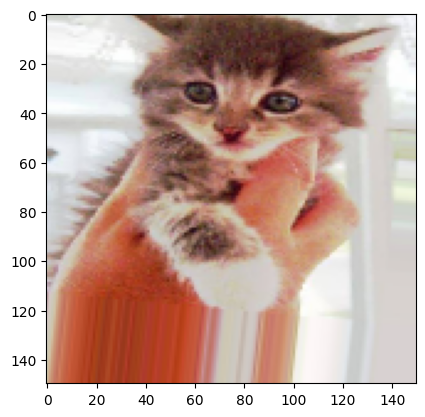

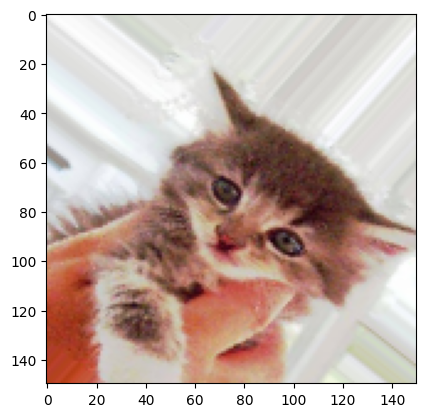

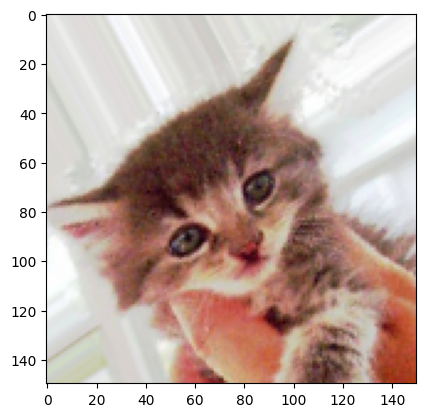

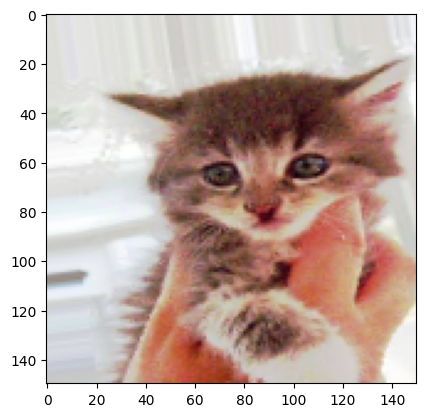

In [19]:
i = 0

# flow() 랜덤하게 변환한 이미지 무한 생성
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

> 데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지는 않는다. 그래서 위처럼 약간의 변화를 주어 학습 시킴으로써 과적합을 방지할 수 있다. 하지만 새로운 정보를 만들어낸 것이 아니고 단지 기존 정보의 재조합만으로 만들어진 이미지이다 보니 완전히 과대적합을 제거하기에 충분하지 않을 수 있다.

# 4. Dropout
> Dropout은 과적합을 방지하기 위한 방법 중 하나이다.

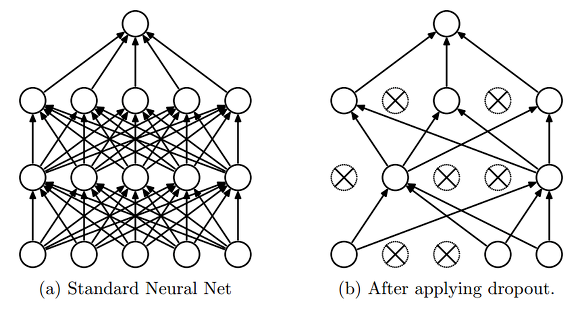

> 적은 데이터로 많은 학습을 하게 되면 학습데이터에 과적합될 가능성이 높아진다. Dropout은 네트워크의 모든 값을 사용하는 것이 아닌 일부만 사용하여 과적합을 해결하는 방법이다.

> 참조 : https://mongxmongx2.tistory.com/26

In [20]:
from keras import layers, Input, models 
from keras import optimizers

model = models.Sequential()
model.add(Input(shape=(150,150,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.0001), 
              metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

base_path = 'image/cats_and_dogs/data/'
train_dir = base_path+"train"
validation_dir = base_path + "validation"

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=20, class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150,150), batch_size=20, class_mode='binary'
)

Found 1215 images belonging to 2 classes.
Found 870 images belonging to 2 classes.


In [24]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100


C:\Users\kys05\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 325ms/step - acc: 0.7483 - loss: 0.5742 - val_acc: 0.5172 - val_loss: 0.9474
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - acc: 0.7721 - loss: 0.5584 - val_acc: 0.5172 - val_loss: 0.7641
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - acc: 0.7746 - loss: 0.5490 - val_acc: 0.5172 - val_loss: 0.7730
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - acc: 0.7766 - loss: 0.5452 - val_acc: 0.5172 - val_loss: 0.8463
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - acc: 0.7737 - loss: 0.5447 - val_acc: 0.5172 - val_loss: 0.8110
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - acc: 0.7878 - loss: 0.5351 - val_acc: 0.5172 - val_loss: 0.8633
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - acc: 0.7901 - loss: 0.5164 - val_acc: 0.5172 - val_loss: 0.8309
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - acc: 0.7809 - loss: 0.5253 - val_acc: 0.5172 - val_loss: 0.8394
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/ste

> 45분정도 소요됨

In [26]:
model.save('model/cats_and_dogs_0718_v2.keras')

In [29]:
import numpy as np

np.save('model/my_history_0718_v2.npy', history.history)

결과 그래프를 다시 그려 보죠:

In [30]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

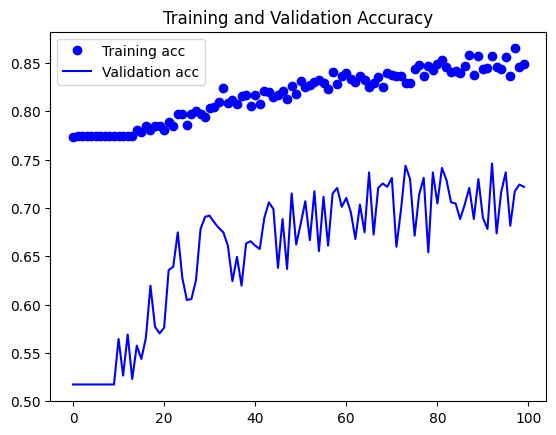

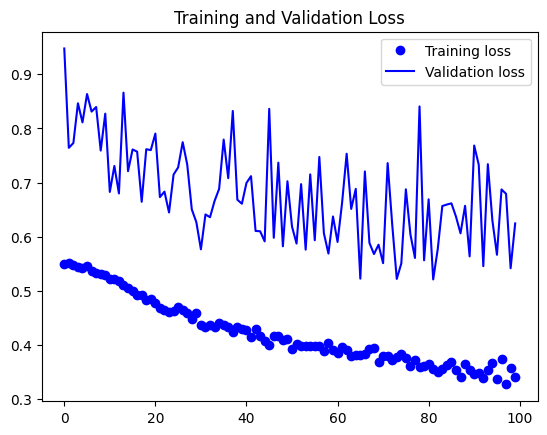

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

그림 5-12와 5-13을 참고하세요. 데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다. 다음 두 절에서 이에 대해 집중적으로 살펴보겠습니다.